In [1]:
# modules required for handling dataframes
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from ete3 import NCBITaxa 
ncbi = NCBITaxa()

In [2]:
def search_rank_output_name_append_column(df, staxid_column, rank_search):
    """Input df, staxid_column from same df and rank_search (a desired taxonomic rank 
    from each staxid's lineage), outputs taxonomic name corresponding to rank_search or 'Unclassified' if
    unavailable and appends to df row by row"""
    rank_list = []
    for read_index in range(0, len(staxid_column)):
        taxid = ''
        if ';' in str(staxid_column[read_index]):
            taxid = staxid_column[read_index].split(';')[0]
        else:
            taxid = staxid_column[read_index]
        
        taxid_lineage = ''
        taxid_lineage = ncbi.get_lineage(taxid)
        
        names = ''
        names = ncbi.get_taxid_translator(taxid_lineage)
        
        ranks = ''
        ranks = ncbi.get_rank(taxid_lineage) #Dict
        
        ranks2names = ''
        ranks2names = {ranks[k]:names[k] for k in names.keys() & ranks}
        
        if rank_search in ranks2names.keys():
            rank_list.append(ranks2names[rank_search])#if rank in dict, print name
        else:
            rank_list.append('Unclassified')
    df[rank_search] = rank_list
    
def trim_df_columns(df,column_list):
    df.drop(columns=column_list, inplace=True)
    
def add_df_headers(df, header_list):
    df.columns = header_list

In [3]:
# Here is the first and the easiest re-analysis from the human clinical nanopore data.
# Define some global variables.
sourcedir = '/home/yiheng/MinION_data/mock_com/figure3_analysis/nanopore_clinical_reanalysis' # the directory where all the documents of each sequencing run are stored.
true_genus = ['Homo', 'Pneumocystis']
summary_df_dir_1 = os.path.join(sourcedir, 'summary_df_replicate4.tab')
# This final df is to get the information of sequencing length.
# The original final_df also has the blast results but we did the blast again just for consistency.
blast_df_dir = os.path.join(sourcedir, 'final_df.all.csv')
blast_df_C1_dir = os.path.join(sourcedir, 'C_1.ntblast_output')
blast_df_C2_dir = os.path.join(sourcedir, 'C_2.ntblast_output')
blast_df_C3_dir = os.path.join(sourcedir, 'C_3.ntblast_output')
blast_df_Pj1_dir = os.path.join(sourcedir, 'Pj_1.ntblast_output')
blast_df_Pj2_dir = os.path.join(sourcedir, 'Pj_2.ntblast_output')
blast_df_Pj3_dir = os.path.join(sourcedir, 'Pj_3.ntblast_output')

In [4]:
summary_df_1 = pd.read_csv(summary_df_dir_1, sep='\t')
blast_df = pd.read_csv(blast_df_dir, sep='\t', index_col=0)

/home/yiheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/yiheng/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
blast_df_C1 = pd.read_csv(blast_df_C1_dir, sep='\t')
blast_df_C2 = pd.read_csv(blast_df_C2_dir, sep='\t')
blast_df_C3 = pd.read_csv(blast_df_C3_dir, sep='\t')
blast_df_Pj1 = pd.read_csv(blast_df_Pj1_dir, sep='\t')
blast_df_Pj2 = pd.read_csv(blast_df_Pj2_dir, sep='\t')
blast_df_Pj3 = pd.read_csv(blast_df_Pj3_dir, sep='\t')

/home/yiheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
blast_header_1 = ['qseqid', 'sseqid', 'evalue', 'bitscore', 'length', 'pident', 'nident', 'sgi', 'sacc', 'staxids', 'sscinames', 'scomnames', 'sskingdoms', 'sstart', 'send']
blast_header_2 = ['qseqid', 'sseqid', 'evalue', 'bitscore', 'length', 'pident', 'nident', 'sgi', 'sacc', 'staxids', 'sscinames', 'scomnames']
add_df_headers(blast_df_C1, blast_header_2)
add_df_headers(blast_df_C2, blast_header_2)
add_df_headers(blast_df_C3, blast_header_2)
# This two different header list is due to different blast comamnds in the original paper.
add_df_headers(blast_df_Pj1, blast_header_1)
add_df_headers(blast_df_Pj2, blast_header_1)
add_df_headers(blast_df_Pj3, blast_header_1)

In [7]:
blast_df_C2.columns

Index(['qseqid', 'sseqid', 'evalue', 'bitscore', 'length', 'pident', 'nident',
       'sgi', 'sacc', 'staxids', 'sscinames', 'scomnames'],
      dtype='object')

In [8]:
columns_to_drop_1 = ['sseqid', 'evalue', 'bitscore', 'pident', 'nident', 'sgi', 'sacc', 'staxids', 'sscinames', 'scomnames']
columns_to_drop_2 = ['sseqid', 'evalue', 'bitscore', 'pident', 'nident', 'sgi', 'sacc', 'staxids', 'sscinames', 'scomnames', 'sskingdoms', 'sstart', 'send']

blast_df_C1_trim = blast_df_C1.drop(columns=columns_to_drop_1)
blast_df_C1_trim.drop_duplicates(inplace=True, ignore_index=True)

blast_df_C2_trim = blast_df_C2.drop(columns=columns_to_drop_1)
blast_df_C2_trim.drop_duplicates(inplace=True, ignore_index=True)

blast_df_C3_trim = blast_df_C3.drop(columns=columns_to_drop_1)
blast_df_C3_trim.drop_duplicates(inplace=True, ignore_index=True)

blast_df_Pj1_trim = blast_df_Pj1.drop(columns=columns_to_drop_2)
blast_df_Pj1_trim.drop_duplicates(inplace=True, ignore_index=True)

blast_df_Pj2_trim = blast_df_Pj2.drop(columns=columns_to_drop_2)
blast_df_Pj2_trim.drop_duplicates(inplace=True, ignore_index=True)

blast_df_Pj3_trim = blast_df_Pj3.drop(columns=columns_to_drop_2)
blast_df_Pj3_trim.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
blast_df.columns

Index(['family_blast', 'genus_blast', 'phylum_blast', 'superkingdom_blast',
       'read_id_wimp', 'barcode_wimp', 'seqlen_wimp', 'superkingdom_wimp',
       'phylum_wimp', 'family_wimp', 'genus_wimp', 'sample'],
      dtype='object')

In [10]:
blast_df_trim = blast_df.drop(columns=['barcode_wimp','superkingdom_wimp', 'phylum_wimp', 'family_wimp', 'genus_wimp'], axis=0)

In [11]:
# This is trimming the final blast df first then extract samples based on their IDs
blast_df_trim_C1 = blast_df_trim[blast_df_trim['sample'] == 'C_1']
blast_df_trim_C1 = blast_df_trim_C1[blast_df_trim_C1.read_id_wimp.isin(blast_df_C1_trim.qseqid)]
blast_df_trim_C1 = blast_df_trim_C1.reset_index(drop=True)

blast_df_trim_C2 = blast_df_trim[blast_df_trim['sample'] == 'C_2']
blast_df_trim_C2 = blast_df_trim_C2[blast_df_trim_C2.read_id_wimp.isin(blast_df_C2_trim.qseqid)]
blast_df_trim_C2 = blast_df_trim_C2.reset_index(drop=True)

blast_df_trim_C3 = blast_df_trim[blast_df_trim['sample'] == 'C_3']
blast_df_trim_C3 = blast_df_trim_C3[blast_df_trim_C3.read_id_wimp.isin(blast_df_C3_trim.qseqid)]
blast_df_trim_C3 = blast_df_trim_C3.reset_index(drop=True)

blast_df_trim_Pj1 = blast_df_trim[blast_df_trim['sample'] == 'Pj_1']
blast_df_trim_Pj1 = blast_df_trim_Pj1[blast_df_trim_Pj1.read_id_wimp.isin(blast_df_Pj1_trim.qseqid)]
blast_df_trim_Pj1 = blast_df_trim_Pj1.reset_index(drop=True)

blast_df_trim_Pj2 = blast_df_trim[blast_df_trim['sample'] == 'Pj_2']
blast_df_trim_Pj2 = blast_df_trim_Pj2[blast_df_trim_Pj2.read_id_wimp.isin(blast_df_Pj2_trim.qseqid)]
blast_df_trim_Pj2 = blast_df_trim_Pj2.reset_index(drop=True)

blast_df_trim_Pj3 = blast_df_trim[blast_df_trim['sample'] == 'Pj_3']
blast_df_trim_Pj3 = blast_df_trim_Pj3[blast_df_trim_Pj3.read_id_wimp.isin(blast_df_Pj3_trim.qseqid)]
blast_df_trim_Pj3 = blast_df_trim_Pj3.reset_index(drop=True)

In [12]:
blast_df_C1_merge = pd.merge(blast_df_C1_trim, blast_df_trim_C1, how='outer', left_on='qseqid', right_on='read_id_wimp')
blast_df_C2_merge = pd.merge(blast_df_C2_trim, blast_df_trim_C2, how='outer', left_on='qseqid', right_on='read_id_wimp')
blast_df_C3_merge = pd.merge(blast_df_C3_trim, blast_df_trim_C3, how='outer', left_on='qseqid', right_on='read_id_wimp')
blast_df_Pj1_merge = pd.merge(blast_df_Pj1_trim, blast_df_trim_Pj1, how='outer', left_on='qseqid', right_on='read_id_wimp')
blast_df_Pj2_merge = pd.merge(blast_df_Pj2_trim, blast_df_trim_Pj2, how='outer', left_on='qseqid', right_on='read_id_wimp')
blast_df_Pj3_merge = pd.merge(blast_df_Pj3_trim, blast_df_trim_Pj3, how='outer', left_on='qseqid', right_on='read_id_wimp')

In [13]:
blast_df_C1_merge = blast_df_C1_merge[blast_df_C1_merge['sample'] == 'C_1']
blast_df_C2_merge = blast_df_C2_merge[blast_df_C2_merge['sample'] == 'C_2']
blast_df_C3_merge = blast_df_C3_merge[blast_df_C3_merge['sample'] == 'C_3']
blast_df_Pj1_merge = blast_df_Pj1_merge[blast_df_Pj1_merge['sample'] == 'Pj_1']
blast_df_Pj2_merge = blast_df_Pj2_merge[blast_df_Pj2_merge['sample'] == 'Pj_2']
blast_df_Pj3_merge = blast_df_Pj3_merge[blast_df_Pj3_merge['sample'] == 'Pj_3']

blast_df_C1_merge = blast_df_C1_merge.reset_index(drop=True)
blast_df_C2_merge = blast_df_C2_merge.reset_index(drop=True)
blast_df_C3_merge = blast_df_C3_merge.reset_index(drop=True)
blast_df_Pj1_merge = blast_df_Pj1_merge.reset_index(drop=True)
blast_df_Pj2_merge = blast_df_Pj2_merge.reset_index(drop=True)
blast_df_Pj3_merge = blast_df_Pj3_merge.reset_index(drop=True)

In [14]:
blast_df_C1_merge['pmatch'] = blast_df_C1_merge.length/blast_df_C1_merge.seqlen_wimp
blast_df_C2_merge['pmatch'] = blast_df_C2_merge.length/blast_df_C2_merge.seqlen_wimp
blast_df_C3_merge['pmatch'] = blast_df_C3_merge.length/blast_df_C3_merge.seqlen_wimp
blast_df_Pj1_merge['pmatch'] = blast_df_Pj1_merge.length/blast_df_Pj1_merge.seqlen_wimp
blast_df_Pj2_merge['pmatch'] = blast_df_Pj2_merge.length/blast_df_Pj2_merge.seqlen_wimp
blast_df_Pj3_merge['pmatch'] = blast_df_Pj3_merge.length/blast_df_Pj3_merge.seqlen_wimp

In [15]:
blast_df_C1_merge_true = blast_df_C1_merge[blast_df_C1_merge.genus_blast == 'Homo']
blast_df_C2_merge_true = blast_df_C2_merge[blast_df_C2_merge.genus_blast == 'Homo']
blast_df_C3_merge_true = blast_df_C3_merge[blast_df_C3_merge.genus_blast == 'Homo']
blast_df_Pj1_merge_true = blast_df_Pj1_merge[blast_df_Pj1_merge.genus_blast.isin(true_genus)]
blast_df_Pj2_merge_true = blast_df_Pj2_merge[blast_df_Pj2_merge.genus_blast.isin(true_genus)]
blast_df_Pj3_merge_true = blast_df_Pj3_merge[blast_df_Pj3_merge.genus_blast.isin(true_genus)]

In [16]:
# Here is the query coverage (pmatch) cut-offs that I applied for each dataset
# As mentioned in the paper, I used the cut-off that resulted in ~20% data loss
blast_df_C1_merge_pmatch_cut = blast_df_C1_merge[blast_df_C1_merge.pmatch >= 0.59]
blast_df_C2_merge_pmatch_cut = blast_df_C2_merge[blast_df_C2_merge.pmatch >= 0.532]
blast_df_C3_merge_pmatch_cut = blast_df_C3_merge[blast_df_C3_merge.pmatch >= 0.54]
blast_df_Pj1_merge_pmatch_cut = blast_df_Pj1_merge[blast_df_Pj1_merge.pmatch >= 0.455]
blast_df_Pj2_merge_pmatch_cut = blast_df_Pj2_merge[blast_df_Pj2_merge.pmatch >= 0.585]
blast_df_Pj3_merge_pmatch_cut = blast_df_Pj3_merge[blast_df_Pj3_merge.pmatch >= 0.504]

In [17]:
blast_df_C1_merge_pmatch_cut_true = blast_df_C1_merge_pmatch_cut[blast_df_C1_merge_pmatch_cut.genus_blast == 'Homo']
blast_df_C2_merge_pmatch_cut_true = blast_df_C2_merge_pmatch_cut[blast_df_C2_merge_pmatch_cut.genus_blast == 'Homo']
blast_df_C3_merge_pmatch_cut_true = blast_df_C3_merge_pmatch_cut[blast_df_C3_merge_pmatch_cut.genus_blast == 'Homo']
blast_df_Pj1_merge_pmatch_cut_true = blast_df_Pj1_merge_pmatch_cut[blast_df_Pj1_merge_pmatch_cut.genus_blast.isin(true_genus)]
blast_df_Pj2_merge_pmatch_cut_true = blast_df_Pj2_merge_pmatch_cut[blast_df_Pj2_merge_pmatch_cut.genus_blast.isin(true_genus)]
blast_df_Pj3_merge_pmatch_cut_true = blast_df_Pj3_merge_pmatch_cut[blast_df_Pj3_merge_pmatch_cut.genus_blast.isin(true_genus)]

In [18]:
# Here is to show the data loss after the cut-offs for each sample
print(1 - blast_df_C1_merge_pmatch_cut.seqlen_wimp.sum()/blast_df_C1_merge.seqlen_wimp.sum())
print(1 - blast_df_C2_merge_pmatch_cut.seqlen_wimp.sum()/blast_df_C2_merge.seqlen_wimp.sum())
print(1 - blast_df_C3_merge_pmatch_cut.seqlen_wimp.sum()/blast_df_C3_merge.seqlen_wimp.sum())
print(1 - blast_df_Pj1_merge_pmatch_cut.seqlen_wimp.sum()/blast_df_Pj1_merge.seqlen_wimp.sum())
print(1 - blast_df_Pj2_merge_pmatch_cut.seqlen_wimp.sum()/blast_df_Pj2_merge.seqlen_wimp.sum())
print(1 - blast_df_Pj3_merge_pmatch_cut.seqlen_wimp.sum()/blast_df_Pj3_merge.seqlen_wimp.sum())

0.20231703822677072
0.20059808444705873
0.20482246492140455
0.20140269739478156
0.2001469649069082
0.2013141196134658


In [19]:
print(blast_df_C1_merge_true.seqlen_wimp.sum()/blast_df_C1_merge.seqlen_wimp.sum())
print(blast_df_C1_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_C1_merge_pmatch_cut.seqlen_wimp.sum())

0.8587677933279713
0.8646510912545989


In [20]:
print(blast_df_C2_merge_true.seqlen_wimp.sum()/blast_df_C2_merge.seqlen_wimp.sum())
print(blast_df_C2_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_C2_merge_pmatch_cut.seqlen_wimp.sum())

0.9786322273122798
0.9846623956458371


In [21]:
print(blast_df_C3_merge_true.seqlen_wimp.sum()/blast_df_C3_merge.seqlen_wimp.sum())
print(blast_df_C3_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_C3_merge_pmatch_cut.seqlen_wimp.sum())

0.9653758096639135
0.9736787716958167


In [22]:
print(blast_df_Pj1_merge_true.seqlen_wimp.sum()/blast_df_Pj1_merge.seqlen_wimp.sum())
print(blast_df_Pj1_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_Pj1_merge_pmatch_cut.seqlen_wimp.sum())

0.16243240199935355
0.1977932172009909


In [23]:
print(blast_df_Pj2_merge_true.seqlen_wimp.sum()/blast_df_Pj2_merge.seqlen_wimp.sum())
print(blast_df_Pj2_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_Pj2_merge_pmatch_cut.seqlen_wimp.sum())

0.7110115596232497
0.6694079368819197


In [24]:
print(blast_df_Pj3_merge_true.seqlen_wimp.sum()/blast_df_Pj3_merge.seqlen_wimp.sum())
print(blast_df_Pj3_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_Pj3_merge_pmatch_cut.seqlen_wimp.sum())

0.9355872402977172
0.9474461772841556


In [25]:
# Here is to re-analyze the wheat field nanopore samples
basedir = '/home/yiheng/MinION_data/mock_com/figure3_analysis/FAH05731_reanalysis'
blast_header = ['qseqid', 'sseqid', 'evalue', 'bitscore', 'length', 'pident', 'nident', 'sgi', 'sacc', 'staxids', 'sscinames', 'scomnames', 'sskingdoms', 'sstart', 'send']
blast_header_drop = ['sseqid', 'bitscore', 'evalue', 'pident', 'nident', 'sgi', 'sacc', 'sskingdoms', 'sscinames', 'sstart', 'send', 'scomnames']

seq_sum_df_dir = os.path.join(basedir, 'sequencing_summary.txt')
blast_df_barcode02_dir = os.path.join(basedir, 'barcode02.oldfungiblast_output')
blast_df_barcode04_dir = os.path.join(basedir, 'barcode04.oldfungiblast_output')
blast_df_barcode05_dir = os.path.join(basedir, 'barcode05.oldfungiblast_output')
blast_df_barcode06_dir = os.path.join(basedir, 'barcode06.oldfungiblast_output')
# Here to use the kraken output file is to grep the query length. We are not using the classification result from the output.
kraken_df_barcode02_dir = os.path.join(basedir, 'barcode02.ncbiITSkraken_output')
kraken_df_barcode04_dir = os.path.join(basedir, 'barcode04.ncbiITSkraken_output')
kraken_df_barcode05_dir = os.path.join(basedir, 'barcode05.ncbiITSkraken_output')
kraken_df_barcode06_dir = os.path.join(basedir, 'barcode06.ncbiITSkraken_output')


In [26]:
blast_df_barcode02 = pd.read_csv(blast_df_barcode02_dir, sep='\t', header=None)
blast_df_barcode04 = pd.read_csv(blast_df_barcode04_dir, sep='\t', header=None)
blast_df_barcode05 = pd.read_csv(blast_df_barcode05_dir, sep='\t', header=None)
blast_df_barcode06 = pd.read_csv(blast_df_barcode06_dir, sep='\t', header=None)

In [27]:
kraken_df_barcode02 = pd.read_csv(kraken_df_barcode02_dir, sep='\t', header=None)
kraken_df_barcode04 = pd.read_csv(kraken_df_barcode04_dir, sep='\t', header=None)
kraken_df_barcode05 = pd.read_csv(kraken_df_barcode05_dir, sep='\t', header=None)
kraken_df_barcode06 = pd.read_csv(kraken_df_barcode06_dir, sep='\t', header=None)
trim_df_columns(kraken_df_barcode02, [0,2,4])
trim_df_columns(kraken_df_barcode04, [0,2,4])
trim_df_columns(kraken_df_barcode05, [0,2,4])
trim_df_columns(kraken_df_barcode06, [0,2,4])
kraken_df_barcode02.columns = ['readid', 'seqlen']
kraken_df_barcode04.columns = ['readid', 'seqlen']
kraken_df_barcode05.columns = ['readid', 'seqlen']
kraken_df_barcode06.columns = ['readid', 'seqlen']

In [28]:
blast_df_barcode02.columns = blast_header
blast_df_barcode04.columns = blast_header
blast_df_barcode05.columns = blast_header
blast_df_barcode06.columns = blast_header
trim_df_columns(blast_df_barcode02, blast_header_drop)
trim_df_columns(blast_df_barcode04, blast_header_drop)
trim_df_columns(blast_df_barcode05, blast_header_drop)
trim_df_columns(blast_df_barcode06, blast_header_drop)

In [29]:
barcode02_df_merge = pd.merge(kraken_df_barcode02, blast_df_barcode02, how='outer', left_on='readid', right_on='qseqid')
barcode04_df_merge = pd.merge(kraken_df_barcode04, blast_df_barcode04, how='outer', left_on='readid', right_on='qseqid')
barcode05_df_merge = pd.merge(kraken_df_barcode05, blast_df_barcode05, how='outer', left_on='readid', right_on='qseqid')
barcode06_df_merge = pd.merge(kraken_df_barcode06, blast_df_barcode06, how='outer', left_on='readid', right_on='qseqid')

In [30]:
barcode02_df_merge.dropna(inplace=True)
barcode04_df_merge.dropna(inplace=True)
barcode05_df_merge.dropna(inplace=True)
barcode06_df_merge.dropna(inplace=True)

barcode02_df_merge = barcode02_df_merge[barcode02_df_merge.staxids != 0]
barcode04_df_merge = barcode04_df_merge[barcode04_df_merge.staxids != 0]
barcode05_df_merge = barcode05_df_merge[barcode05_df_merge.staxids != 0]
barcode06_df_merge = barcode06_df_merge[barcode06_df_merge.staxids != 0]

barcode02_df_merge = barcode02_df_merge.reset_index(drop=True)
barcode04_df_merge = barcode04_df_merge.reset_index(drop=True)
barcode05_df_merge = barcode05_df_merge.reset_index(drop=True)
barcode06_df_merge = barcode06_df_merge.reset_index(drop=True)

In [31]:
barcode02_df_merge['pmatch'] = barcode02_df_merge.length/barcode02_df_merge.seqlen
barcode04_df_merge['pmatch'] = barcode04_df_merge.length/barcode04_df_merge.seqlen
barcode05_df_merge['pmatch'] = barcode05_df_merge.length/barcode05_df_merge.seqlen
barcode06_df_merge['pmatch'] = barcode06_df_merge.length/barcode06_df_merge.seqlen

In [32]:
rank_list = ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
for rank in rank_list:
    search_rank_output_name_append_column(barcode02_df_merge, 
                                          barcode02_df_merge.staxids, 
                                          rank)
    search_rank_output_name_append_column(barcode04_df_merge, 
                                          barcode04_df_merge.staxids, 
                                          rank)
    search_rank_output_name_append_column(barcode05_df_merge, 
                                          barcode05_df_merge.staxids, 
                                          rank)
    search_rank_output_name_append_column(barcode06_df_merge, 
                                          barcode06_df_merge.staxids, 
                                          rank)

In [33]:
true_genus = ['Puccinia', 'Zymoseptoria', 'Pyrenophora']

In [34]:
barcode02_df_merge_true = barcode02_df_merge[barcode02_df_merge.genus.isin(true_genus)]
barcode04_df_merge_true = barcode04_df_merge[barcode04_df_merge.genus.isin(true_genus)]
# barcode05 is pyrenophora
barcode05_df_merge_true = barcode05_df_merge[barcode05_df_merge.genus.isin(true_genus)]
# barcode 06 should be Pst
barcode06_df_merge_true = barcode06_df_merge[barcode06_df_merge.genus.isin(true_genus)]

In [35]:
barcode02_df_merge_pmatch_cut = barcode02_df_merge[barcode02_df_merge.pmatch >= 0.05]
barcode04_df_merge_pmatch_cut = barcode04_df_merge[barcode04_df_merge.pmatch >= 0.0077]
barcode05_df_merge_pmatch_cut = barcode05_df_merge[barcode05_df_merge.pmatch >= 0.12]
barcode06_df_merge_pmatch_cut = barcode06_df_merge[barcode06_df_merge.pmatch >= 0.0061]

In [36]:
# This is to show how much the data loss
print(1 - barcode02_df_merge_pmatch_cut.seqlen.sum()/barcode02_df_merge.seqlen.sum())
print(1 - barcode04_df_merge_pmatch_cut.seqlen.sum()/barcode04_df_merge.seqlen.sum())
print(1 - barcode05_df_merge_pmatch_cut.seqlen.sum()/barcode05_df_merge.seqlen.sum())
print(1 - barcode06_df_merge_pmatch_cut.seqlen.sum()/barcode06_df_merge.seqlen.sum())

0.20049945705090255
0.19939287925644733
0.19745382129156308
0.1998307648698181


In [37]:
barcode02_df_merge_pmatch_cut_true = barcode02_df_merge_pmatch_cut[barcode02_df_merge_pmatch_cut.genus.isin(true_genus)]
barcode04_df_merge_pmatch_cut_true = barcode04_df_merge_pmatch_cut[barcode04_df_merge_pmatch_cut.genus.isin(true_genus)]
# barcode05 is pyrenophora
barcode05_df_merge_pmatch_cut_true = barcode05_df_merge_pmatch_cut[barcode05_df_merge_pmatch_cut.genus.isin(true_genus)]
# barcode 06 is Pst
barcode06_df_merge_pmatch_cut_true = barcode06_df_merge_pmatch_cut[barcode06_df_merge_pmatch_cut.genus.isin(true_genus)]

In [38]:
print(barcode02_df_merge_true.seqlen.sum()/barcode02_df_merge.seqlen.sum())
print(barcode02_df_merge_pmatch_cut_true.seqlen.sum()/barcode02_df_merge_pmatch_cut.seqlen.sum())

0.6044507796300089
0.7511704563481201


In [39]:
print(barcode04_df_merge_true.seqlen.sum()/barcode04_df_merge.seqlen.sum())
print(barcode04_df_merge_pmatch_cut_true.seqlen.sum()/barcode04_df_merge_pmatch_cut.seqlen.sum())

0.34795265641845663
0.4300369120519628


In [40]:
print(barcode05_df_merge_true.seqlen.sum()/barcode05_df_merge.seqlen.sum())
print(barcode05_df_merge_pmatch_cut_true.seqlen.sum()/barcode05_df_merge_pmatch_cut.seqlen.sum())

0.6703494374830633
0.8197141393318622


In [41]:
print(barcode06_df_merge_true.seqlen.sum()/barcode06_df_merge.seqlen.sum())
print(barcode06_df_merge_pmatch_cut_true.seqlen.sum()/barcode06_df_merge_pmatch_cut.seqlen.sum())

0.05784819730439965
0.06164867637645449


In [42]:
# Now is to perform the re-analysis for some available illumina data.

In [43]:
# So we first get the genome coverage files and modify their format
basedir = '/home/yiheng/MinION_data/mock_com/figure3_analysis/illumina_reanalysis'
blast_header = ['qseqid', 'sseqid', 'evalue', 'bitscore', 'length', 'pident', 'nident', 'sgi', 'sacc', 'staxids', 'sscinames', 'scomnames', 'sskingdoms', 'sstart', 'send']
blast_header_drop = ['sseqid', 'bitscore', 'evalue', 'pident', 'nident', 'sgi', 'sacc', 'sskingdoms', 'sscinames', 'sstart', 'send', 'scomnames']

name_0 = 'ERR1135453'
name_1 = 'ERR1135427'
name_2 = 'ERR1135454'
name_3 = 'ERR675617'
name_4 = 'ERR675612'
name_5 = 'ERR675618'

In [44]:
# These genera are based on the classification of the original paper.
true_genus_2 = ['Mus', 'Candida']
true_genus_3 = ['Sus']
true_genus_mouse = ['Anaerostipes', 'Parabacteroides', 'Anaerotruncus', 'Oscillibacter','Clostridium',
                    'Flavonifractor','Bacteroides','Barnesiella','Alistipes','Helicobacter','Saccharibacteria',
                    'Prevotella','Lachnoanaerobaculum','Lactobacillus','Intestinimonas','Roseburia','Alloprevotella',
                    'Rikenella','Enterorhabdus','Erysipelotrichaceae','Eggerthella','Allobaculum','Lachnospiracea',
                    'Pseudoflavonifractor','Bifidobacterium','Marvinbryantia','Mucispirillum','Clostridium','Blautia',
                    'Anaerofilum', 'Parasutterella','Odoribacter','Olsenella','Turicibacter','Gordonibacter','Ruminococcus',
                    'Acetatifactor']
true_genus_pig = ['Pseudobutyrivibrio', 'Parabacteroides', 'Phascolarctobacterium', 'Ruminococcus','Megasphaera',
                  'Sarcina', 'Faecalibacterium', 'Turicibacter', 'Streptococcus', 'Escherichia', 'Shigella','Bacteroides',
                  'Blautia','Alloprevotella', 'Succinivibrio', 'Helicobacter', 'Treponema', 'Clostridium','Lactobacillus',
                  'Prevotella']

In [45]:
def modify_bedgraph(name):
    dataframe = os.path.join(basedir, '%s_coverage.tab' % name)
    bedgraph = pd.read_csv(dataframe, header=None, names=['contig', 'start', 'end', 'cov'], sep='\t')
    bedgraph['len'] = bedgraph.end - bedgraph.start
    bedgraph['total_cov'] = (bedgraph['len'])*(bedgraph['cov'])
    bed_pivot = pd.pivot_table(bedgraph, values=['len', 'total_cov'], index='contig', aggfunc={'len': np.sum, 'total_cov': np.sum})
    bed_pivot.head()
    bed_pivot['average_cov'] = bed_pivot.total_cov/bed_pivot.len
    return bed_pivot

In [46]:
bed_pivot_0 = modify_bedgraph('ERR1135453')
bed_pivot_1 = modify_bedgraph('ERR1135427')
bed_pivot_2 = modify_bedgraph('ERR1135454')
bed_pivot_3 = modify_bedgraph('ERR675617')
bed_pivot_4 = modify_bedgraph('ERR675612')
bed_pivot_5 = modify_bedgraph('ERR675618')

In [47]:
blastdf_0 = pd.read_csv(os.path.join(basedir, '%s.nt.blastoutput' % name_0), sep='\t', header=None)
blastdf_1 = pd.read_csv(os.path.join(basedir, '%s.nt.blastoutput' % name_1), sep='\t', header=None)
blastdf_2 = pd.read_csv(os.path.join(basedir, '%s.nt.blastoutput' % name_2), sep='\t', header=None)
blastdf_3 = pd.read_csv(os.path.join(basedir, '%s.nt.blastoutput' % name_3), sep='\t', header=None)
blastdf_4 = pd.read_csv(os.path.join(basedir, '%s.nt.blastoutput' % name_4), sep='\t', header=None)
blastdf_5 = pd.read_csv(os.path.join(basedir, '%s.nt.blastoutput' % name_5), sep='\t', header=None)

In [48]:
blastdf_0.columns = blast_header
blastdf_1.columns = blast_header
blastdf_2.columns = blast_header
blastdf_3.columns = blast_header
blastdf_4.columns = blast_header
blastdf_5.columns = blast_header
trim_df_columns(blastdf_0, blast_header_drop)
trim_df_columns(blastdf_1, blast_header_drop)
trim_df_columns(blastdf_2, blast_header_drop)
trim_df_columns(blastdf_3, blast_header_drop)
trim_df_columns(blastdf_4, blast_header_drop)
trim_df_columns(blastdf_5, blast_header_drop)

In [49]:
# taxid = 0 means unclassified. This is the problem from the ete3 taxonomic database that it doesn't contains those species.
# I just removed them as there are not much contigs hit them so removing would not affect the precision much..
# Theoratically you could potentially look into the accession and find out the species manually, but that would be too tedious
blastdf_0 = blastdf_0[(blastdf_0.staxids != 0) & (blastdf_0.staxids != '656024') & (blastdf_0.staxids != '2567938') & (blastdf_0.staxids != '545612')]
blastdf_1 = blastdf_1[(blastdf_1.staxids != 0) & (blastdf_1.staxids != '2567938') & (blastdf_1.staxids != '656024')]
blastdf_2 = blastdf_2[(blastdf_2.staxids != 0) & (blastdf_2.staxids != '656024') & (blastdf_2.staxids != '2567938') & (blastdf_2.staxids != '545612')]
blastdf_3 = blastdf_3[(blastdf_3.staxids != 0) & (blastdf_3.staxids != '545612')]
blastdf_4 = blastdf_4[blastdf_4.staxids != 0]
blastdf_5 = blastdf_5[blastdf_5.staxids != 0]
blastdf_0 = blastdf_0.reset_index(drop=True)
blastdf_1 = blastdf_1.reset_index(drop=True)
blastdf_2 = blastdf_2.reset_index(drop=True)
blastdf_3 = blastdf_3.reset_index(drop=True)
blastdf_4 = blastdf_4.reset_index(drop=True)
blastdf_5 = blastdf_5.reset_index(drop=True)

In [50]:
rank_list = ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
for rank in rank_list:
    search_rank_output_name_append_column(blastdf_0, 
                                          blastdf_0.staxids, 
                                          rank)

In [51]:
for rank in rank_list:
    search_rank_output_name_append_column(blastdf_1, 
                                          blastdf_1.staxids, 
                                          rank)

In [52]:
for rank in rank_list:
    search_rank_output_name_append_column(blastdf_2, 
                                          blastdf_2.staxids, 
                                          rank)

In [53]:
for rank in rank_list:
    search_rank_output_name_append_column(blastdf_3, 
                                          blastdf_3.staxids, 
                                          rank)

In [54]:
for rank in rank_list:
    search_rank_output_name_append_column(blastdf_4, 
                                          blastdf_4.staxids, 
                                          rank)

In [55]:
for rank in rank_list:
    search_rank_output_name_append_column(blastdf_5, 
                                          blastdf_5.staxids, 
                                          rank)

In [56]:
blastdf_0_merge = pd.merge(bed_pivot_0, blastdf_0, how='outer', left_on='contig', right_on='qseqid')
blastdf_1_merge = pd.merge(bed_pivot_1, blastdf_1, how='outer', left_on='contig', right_on='qseqid')
blastdf_2_merge = pd.merge(bed_pivot_2, blastdf_2, how='outer', left_on='contig', right_on='qseqid')
blastdf_3_merge = pd.merge(bed_pivot_3, blastdf_3, how='outer', left_on='contig', right_on='qseqid')
blastdf_4_merge = pd.merge(bed_pivot_4, blastdf_4, how='outer', left_on='contig', right_on='qseqid')
blastdf_5_merge = pd.merge(bed_pivot_5, blastdf_5, how='outer', left_on='contig', right_on='qseqid')

In [57]:
blastdf_0_merge.dropna(inplace=True)
blastdf_0_merge = blastdf_0_merge.reset_index(drop=True)
blastdf_1_merge.dropna(inplace=True)
blastdf_1_merge = blastdf_1_merge.reset_index(drop=True)
blastdf_2_merge.dropna(inplace=True)
blastdf_2_merge = blastdf_2_merge.reset_index(drop=True)
blastdf_3_merge.dropna(inplace=True)
blastdf_3_merge = blastdf_3_merge.reset_index(drop=True)
blastdf_4_merge.dropna(inplace=True)
blastdf_4_merge = blastdf_4_merge.reset_index(drop=True)
blastdf_5_merge.dropna(inplace=True)
blastdf_5_merge = blastdf_5_merge.reset_index(drop=True)

In [58]:
blastdf_0_merge['pmatch'] = blastdf_0_merge.length/blastdf_0_merge.len
blastdf_1_merge['pmatch'] = blastdf_1_merge.length/blastdf_1_merge.len
blastdf_2_merge['pmatch'] = blastdf_2_merge.length/blastdf_2_merge.len
blastdf_3_merge['pmatch'] = blastdf_3_merge.length/blastdf_3_merge.len
blastdf_4_merge['pmatch'] = blastdf_4_merge.length/blastdf_4_merge.len
blastdf_5_merge['pmatch'] = blastdf_5_merge.length/blastdf_5_merge.len

In [59]:
blastdf_0_merge_true = blastdf_0_merge[blastdf_0_merge.genus.isin(true_genus_pig)]
blastdf_0_merge_pmatch_cut = blastdf_0_merge[blastdf_0_merge.pmatch >= 0.024]
blastdf_0_merge_pmatch_cut_true = blastdf_0_merge_pmatch_cut[blastdf_0_merge_pmatch_cut.genus.isin(true_genus_pig)]

In [60]:
blastdf_1_merge_true = blastdf_1_merge[blastdf_1_merge.genus.isin(true_genus_pig)]
blastdf_1_merge_pmatch_cut = blastdf_1_merge[blastdf_1_merge.pmatch >= 0.033]
blastdf_1_merge_pmatch_cut_true = blastdf_1_merge_pmatch_cut[blastdf_1_merge_pmatch_cut.genus.isin(true_genus_pig)]

In [61]:
blastdf_2_merge_true = blastdf_2_merge[blastdf_2_merge.genus.isin(true_genus_pig)]
blastdf_2_merge_pmatch_cut = blastdf_2_merge[blastdf_2_merge.pmatch >= 0.026]
blastdf_2_merge_pmatch_cut_true = blastdf_2_merge_pmatch_cut[blastdf_2_merge_pmatch_cut.genus.isin(true_genus_pig)]

In [62]:
blastdf_3_merge_true = blastdf_3_merge[blastdf_3_merge.genus.isin(true_genus_mouse)]
blastdf_3_merge_pmatch_cut = blastdf_3_merge[blastdf_3_merge.pmatch >= 0.034]
blastdf_3_merge_pmatch_cut_true = blastdf_3_merge_pmatch_cut[blastdf_3_merge_pmatch_cut.genus.isin(true_genus_mouse)]

In [63]:
blastdf_4_merge_true = blastdf_4_merge[blastdf_4_merge.genus.isin(true_genus_mouse)]
blastdf_4_merge_pmatch_cut = blastdf_4_merge[blastdf_4_merge.pmatch >= 0.14]
blastdf_4_merge_pmatch_cut_true = blastdf_4_merge_pmatch_cut[blastdf_4_merge_pmatch_cut.genus.isin(true_genus_mouse)]

In [64]:
blastdf_5_merge_true = blastdf_5_merge[blastdf_5_merge.genus.isin(true_genus_mouse)]
blastdf_5_merge_pmatch_cut = blastdf_5_merge[blastdf_5_merge.pmatch >= 0.045]
blastdf_5_merge_pmatch_cut_true = blastdf_5_merge_pmatch_cut[blastdf_5_merge_pmatch_cut.genus.isin(true_genus_mouse)]

In [65]:
print(1 - blastdf_0_merge_pmatch_cut.len.sum()/blastdf_0_merge.len.sum())
print(1 - blastdf_1_merge_pmatch_cut.len.sum()/blastdf_1_merge.len.sum())
print(1 - blastdf_2_merge_pmatch_cut.len.sum()/blastdf_2_merge.len.sum())
print(1 - blastdf_3_merge_pmatch_cut.len.sum()/blastdf_3_merge.len.sum())
print(1 - blastdf_4_merge_pmatch_cut.len.sum()/blastdf_4_merge.len.sum())
print(1 - blastdf_5_merge_pmatch_cut.len.sum()/blastdf_5_merge.len.sum())

0.2005255801302821
0.2017391893861833
0.20150949826928544
0.19816542838165074
0.20087029756295693
0.20196009112935476


In [66]:
print(blastdf_0_merge_true.total_cov.sum()/blastdf_0_merge.total_cov.sum())
print(blastdf_0_merge_pmatch_cut_true.total_cov.sum()/blastdf_0_merge_pmatch_cut.total_cov.sum())

0.3201613646069619
0.3541279820913822


In [67]:
print(blastdf_1_merge_true.total_cov.sum()/blastdf_1_merge.total_cov.sum())
print(blastdf_1_merge_pmatch_cut_true.total_cov.sum()/blastdf_1_merge_pmatch_cut.total_cov.sum())

0.3420200823033689
0.36639283803472605


In [68]:
print(blastdf_2_merge_true.total_cov.sum()/blastdf_2_merge.total_cov.sum())
print(blastdf_2_merge_pmatch_cut_true.total_cov.sum()/blastdf_2_merge_pmatch_cut.total_cov.sum())

0.35177865808871284
0.3831353830224373


In [69]:
print(blastdf_3_merge_true.total_cov.sum()/blastdf_3_merge.total_cov.sum())
print(blastdf_3_merge_pmatch_cut_true.total_cov.sum()/blastdf_3_merge_pmatch_cut.total_cov.sum())

0.29061306004388554
0.23555919711277024


In [70]:
print(blastdf_4_merge_true.total_cov.sum()/blastdf_4_merge.total_cov.sum())
print(blastdf_4_merge_pmatch_cut_true.total_cov.sum()/blastdf_4_merge_pmatch_cut.total_cov.sum())

0.6371446283241418
0.6935489162689211


In [71]:
print(blastdf_5_merge_true.total_cov.sum()/blastdf_5_merge.total_cov.sum())
print(blastdf_5_merge_pmatch_cut_true.total_cov.sum()/blastdf_5_merge_pmatch_cut.total_cov.sum())

0.3860410589222623
0.42294094327493087


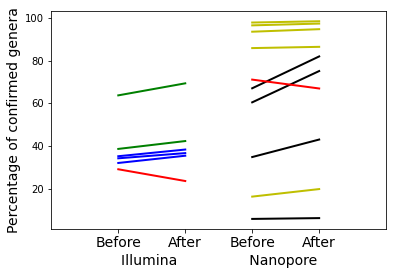

In [72]:
# Just a small figure to illustrate the change. Later on we decided to use a table instead.
plt.xlim(1,1.5)
plt.xlabel('Illumina                Nanopore', fontsize=14)
plt.ylabel('Percentage of confirmed genera', fontsize=14)
plt.xticks((1.1, 1.2, 1.3, 1.4), ('Before', 'After', 'Before', 'After'), fontsize=14)
# This is to plot the average/mean lines for each sample
plt.plot([1.1,1.2], 
        [blastdf_0_merge_true.total_cov.sum()/blastdf_0_merge.total_cov.sum()*100,
         blastdf_0_merge_pmatch_cut_true.total_cov.sum()/blastdf_0_merge_pmatch_cut.total_cov.sum()*100], lw=2, color='b')
plt.plot([1.1,1.2], 
        [blastdf_1_merge_true.total_cov.sum()/blastdf_1_merge.total_cov.sum()*100,
         blastdf_1_merge_pmatch_cut_true.total_cov.sum()/blastdf_1_merge_pmatch_cut.total_cov.sum()*100], lw=2, color='b')
plt.plot([1.1,1.2], 
         [blastdf_2_merge_true.total_cov.sum()/blastdf_2_merge.total_cov.sum()*100,
          blastdf_2_merge_pmatch_cut_true.total_cov.sum()/blastdf_2_merge_pmatch_cut.total_cov.sum()*100], lw=2, color='b')
plt.plot([1.1,1.2], 
         [blastdf_3_merge_true.total_cov.sum()/blastdf_3_merge.total_cov.sum()*100,
          blastdf_3_merge_pmatch_cut_true.total_cov.sum()/blastdf_3_merge_pmatch_cut.total_cov.sum()*100], lw=2, color='r')
plt.plot([1.1,1.2], 
         [blastdf_4_merge_true.total_cov.sum()/blastdf_4_merge.total_cov.sum()*100,
          blastdf_4_merge_pmatch_cut_true.total_cov.sum()/blastdf_4_merge_pmatch_cut.total_cov.sum()*100], lw=2, color='g')
plt.plot([1.1,1.2], 
         [blastdf_5_merge_true.total_cov.sum()/blastdf_5_merge.total_cov.sum()*100,
          blastdf_5_merge_pmatch_cut_true.total_cov.sum()/blastdf_5_merge_pmatch_cut.total_cov.sum()*100], lw=2, color='g')

plt.plot([1.3,1.4], 
         [barcode02_df_merge_true.seqlen.sum()/barcode02_df_merge.seqlen.sum()*100,
          barcode02_df_merge_pmatch_cut_true.seqlen.sum()/barcode02_df_merge_pmatch_cut.seqlen.sum()*100], lw=2, color='k')
plt.plot([1.3,1.4], 
         [barcode04_df_merge_true.seqlen.sum()/barcode04_df_merge.seqlen.sum()*100,
          barcode04_df_merge_pmatch_cut_true.seqlen.sum()/barcode04_df_merge_pmatch_cut.seqlen.sum()*100], lw=2, color='k')
plt.plot([1.3,1.4], 
         [barcode05_df_merge_true.seqlen.sum()/barcode05_df_merge.seqlen.sum()*100,
          barcode05_df_merge_pmatch_cut_true.seqlen.sum()/barcode05_df_merge_pmatch_cut.seqlen.sum()*100], lw=2, color='k')
plt.plot([1.3,1.4], 
         [barcode06_df_merge_true.seqlen.sum()/barcode06_df_merge.seqlen.sum()*100,
          barcode06_df_merge_pmatch_cut_true.seqlen.sum()/barcode06_df_merge_pmatch_cut.seqlen.sum()*100], lw=2, color='k')
plt.plot([1.3,1.4], 
         [blast_df_C1_merge_true.seqlen_wimp.sum()/blast_df_C1_merge.seqlen_wimp.sum()*100,
          blast_df_C1_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_C1_merge_pmatch_cut.seqlen_wimp.sum()*100], lw=2, color='y')
plt.plot([1.3,1.4], 
         [blast_df_C2_merge_true.seqlen_wimp.sum()/blast_df_C2_merge.seqlen_wimp.sum()*100,
          blast_df_C2_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_C2_merge_pmatch_cut.seqlen_wimp.sum()*100], lw=2, color='y')
plt.plot([1.3,1.4], 
         [blast_df_C3_merge_true.seqlen_wimp.sum()/blast_df_C3_merge.seqlen_wimp.sum()*100,
          blast_df_C3_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_C3_merge_pmatch_cut.seqlen_wimp.sum()*100], lw=2, color='y')
plt.plot([1.3,1.4], 
         [blast_df_Pj1_merge_true.seqlen_wimp.sum()/blast_df_Pj1_merge.seqlen_wimp.sum()*100,
          blast_df_Pj1_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_Pj1_merge_pmatch_cut.seqlen_wimp.sum()*100], lw=2, color='y')
plt.plot([1.3,1.4], 
         [blast_df_Pj2_merge_true.seqlen_wimp.sum()/blast_df_Pj2_merge.seqlen_wimp.sum()*100,
          blast_df_Pj2_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_Pj2_merge_pmatch_cut.seqlen_wimp.sum()*100], lw=2, color='r')
plt.plot([1.3,1.4], 
         [blast_df_Pj3_merge_true.seqlen_wimp.sum()/blast_df_Pj3_merge.seqlen_wimp.sum()*100,
          blast_df_Pj3_merge_pmatch_cut_true.seqlen_wimp.sum()/blast_df_Pj3_merge_pmatch_cut.seqlen_wimp.sum()*100], lw=2, color='y')

#plt.savefig(os.path.join(sourcedir, 'Figure3.png'), bbox_inches="tight", dpi=1000)
plt.show()